In [1]:
%matplotlib inline
%reload_ext autoreload
%autoreload 2

In [2]:
import fastai as fai
import fastai.vision as fv
from pathlib import Path

In [3]:
images = Path("train")

In [4]:
transforms = fv.get_transforms(flip_vert=False, max_rotate=45, max_zoom=1.25, max_lighting=0.3)
#flip_vert=False we don't want upside-down dogs

In [5]:
def load_data(folder, img_size, batch_size):
    data = (fv.ImageItemList
           .from_folder(folder)
           .random_split_by_pct(valid_pct=0.1)
           .label_from_folder()
           .transform(transforms,size=img_size)
           .databunch(bs=batch_size)
           .normalize(fv.imagenet_stats))
    return data

In [6]:
data = load_data(images, 224, 32)

In [ ]:
#data.show_batch(rows=3)

In [7]:
learner = fv.create_cnn(data, fv.models.resnet18, metrics=
                        [fai.metrics.accuracy, fai.metrics.error_rate], wd=0.1)

In [ ]:
learner.fit_one_cycle(5)

In [ ]:
#learner.lr_find()
#learner.recorder.plot()

In [ ]:
learner.fit_one_cycle(4, max_lr=1e-3)

In [ ]:
learner.save("stage1.1")

In [ ]:
learner.recorder.plot_losses()

In [ ]:
learner.unfreeze()

In [ ]:
learner.lr_find()
learner.recorder.plot()

In [ ]:
learner.fit_one_cycle(4, max_lr=slice(1e-5,1e-4))

In [ ]:
learner.fit_one_cycle(4, max_lr=1e-6)

In [ ]:
learner.save("stage3")

In [8]:
learner.load("stage3")

Learner(data=ImageDataBunch;

Train: LabelList
y: CategoryList (6651 items)
[Category pug, Category pug, Category pug, Category pug, Category pug]...
Path: train
x: ImageItemList (6651 items)
[Image (3, 225, 300), Image (3, 500, 332), Image (3, 375, 500), Image (3, 500, 332), Image (3, 225, 300)]...
Path: train;

Valid: LabelList
y: CategoryList (739 items)
[Category japanese_chin, Category havanese, Category keeshond, Category shiba_inu, Category pomeranian]...
Path: train
x: ImageItemList (739 items)
[Image (3, 375, 500), Image (3, 400, 500), Image (3, 375, 500), Image (3, 500, 333), Image (3, 300, 297)]...
Path: train;

Test: None, model=Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): BasicB

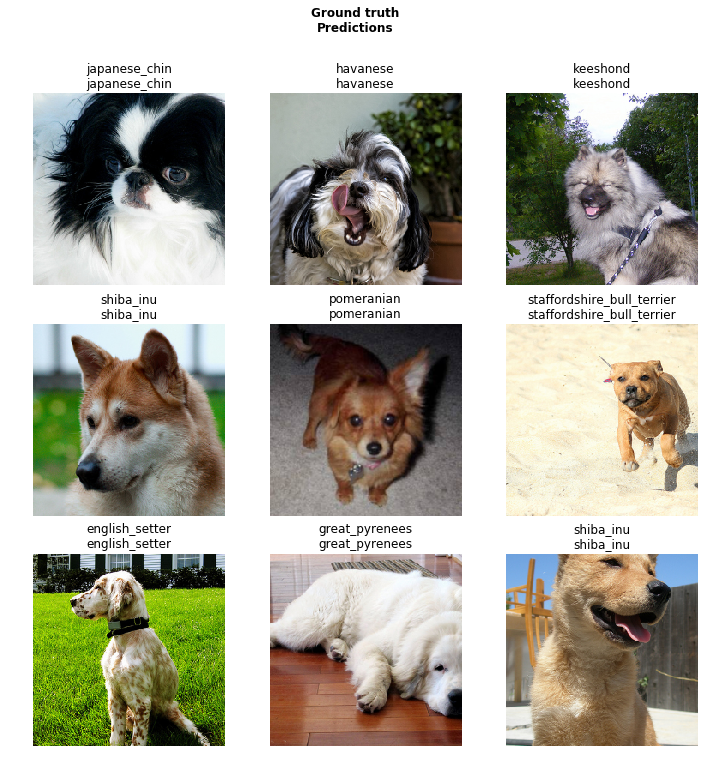

In [9]:
learner.show_results(ds_type=fai.data_block.DatasetType.Valid, rows=3)

# Proceso
No estoy completamente seguro de que esto era lo que hice, pero es lo que más o menos me acuerdo
### Para entrenar daba 5 epochs normales sin límite de LR, seguido con 4 epochs con max_lr=1e-3, ya que más o menos eso parecía lo mejor viendo la gráfica de lr_find()

### quitamos el "freeze" para revisar otra vez lr_find() y ahora sale mejor 1e-4, volvemos a hacer 4 epochs (con slice 1e-5 a 1e-4) y volviendo a checar lr_find(). Ahora más o menos parece 1e-6 entonces le puse 4 epochs parejo (sin slice) y salió estos resultados.

In [10]:
fai.metrics.accuracy(*learner.TTA())

tensor(0.9838)

In [11]:
interpreter = learner.interpret()

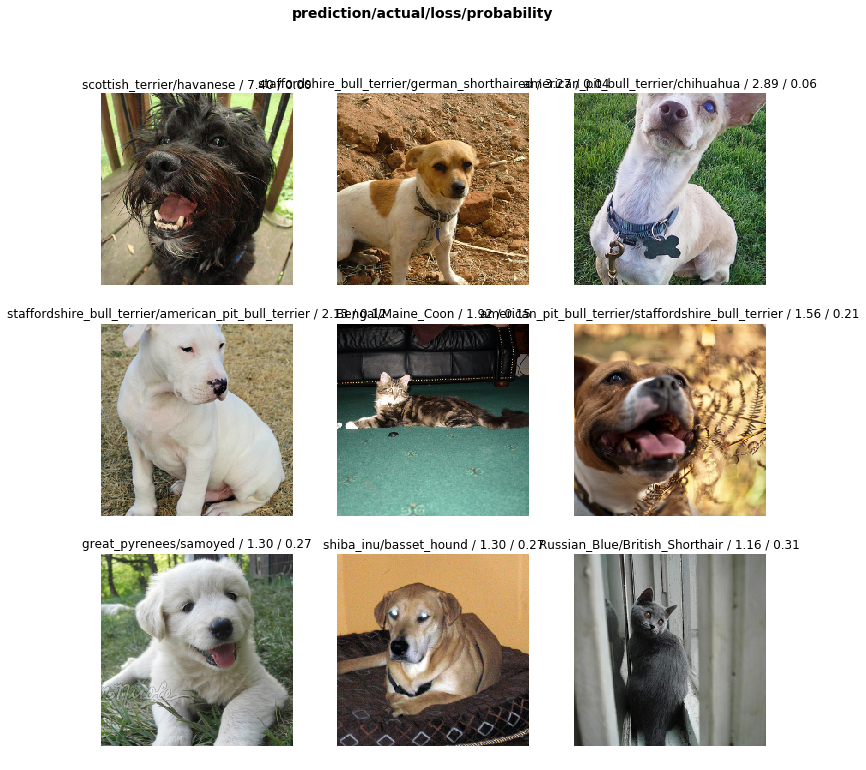

In [12]:
interpreter.plot_top_losses(9)

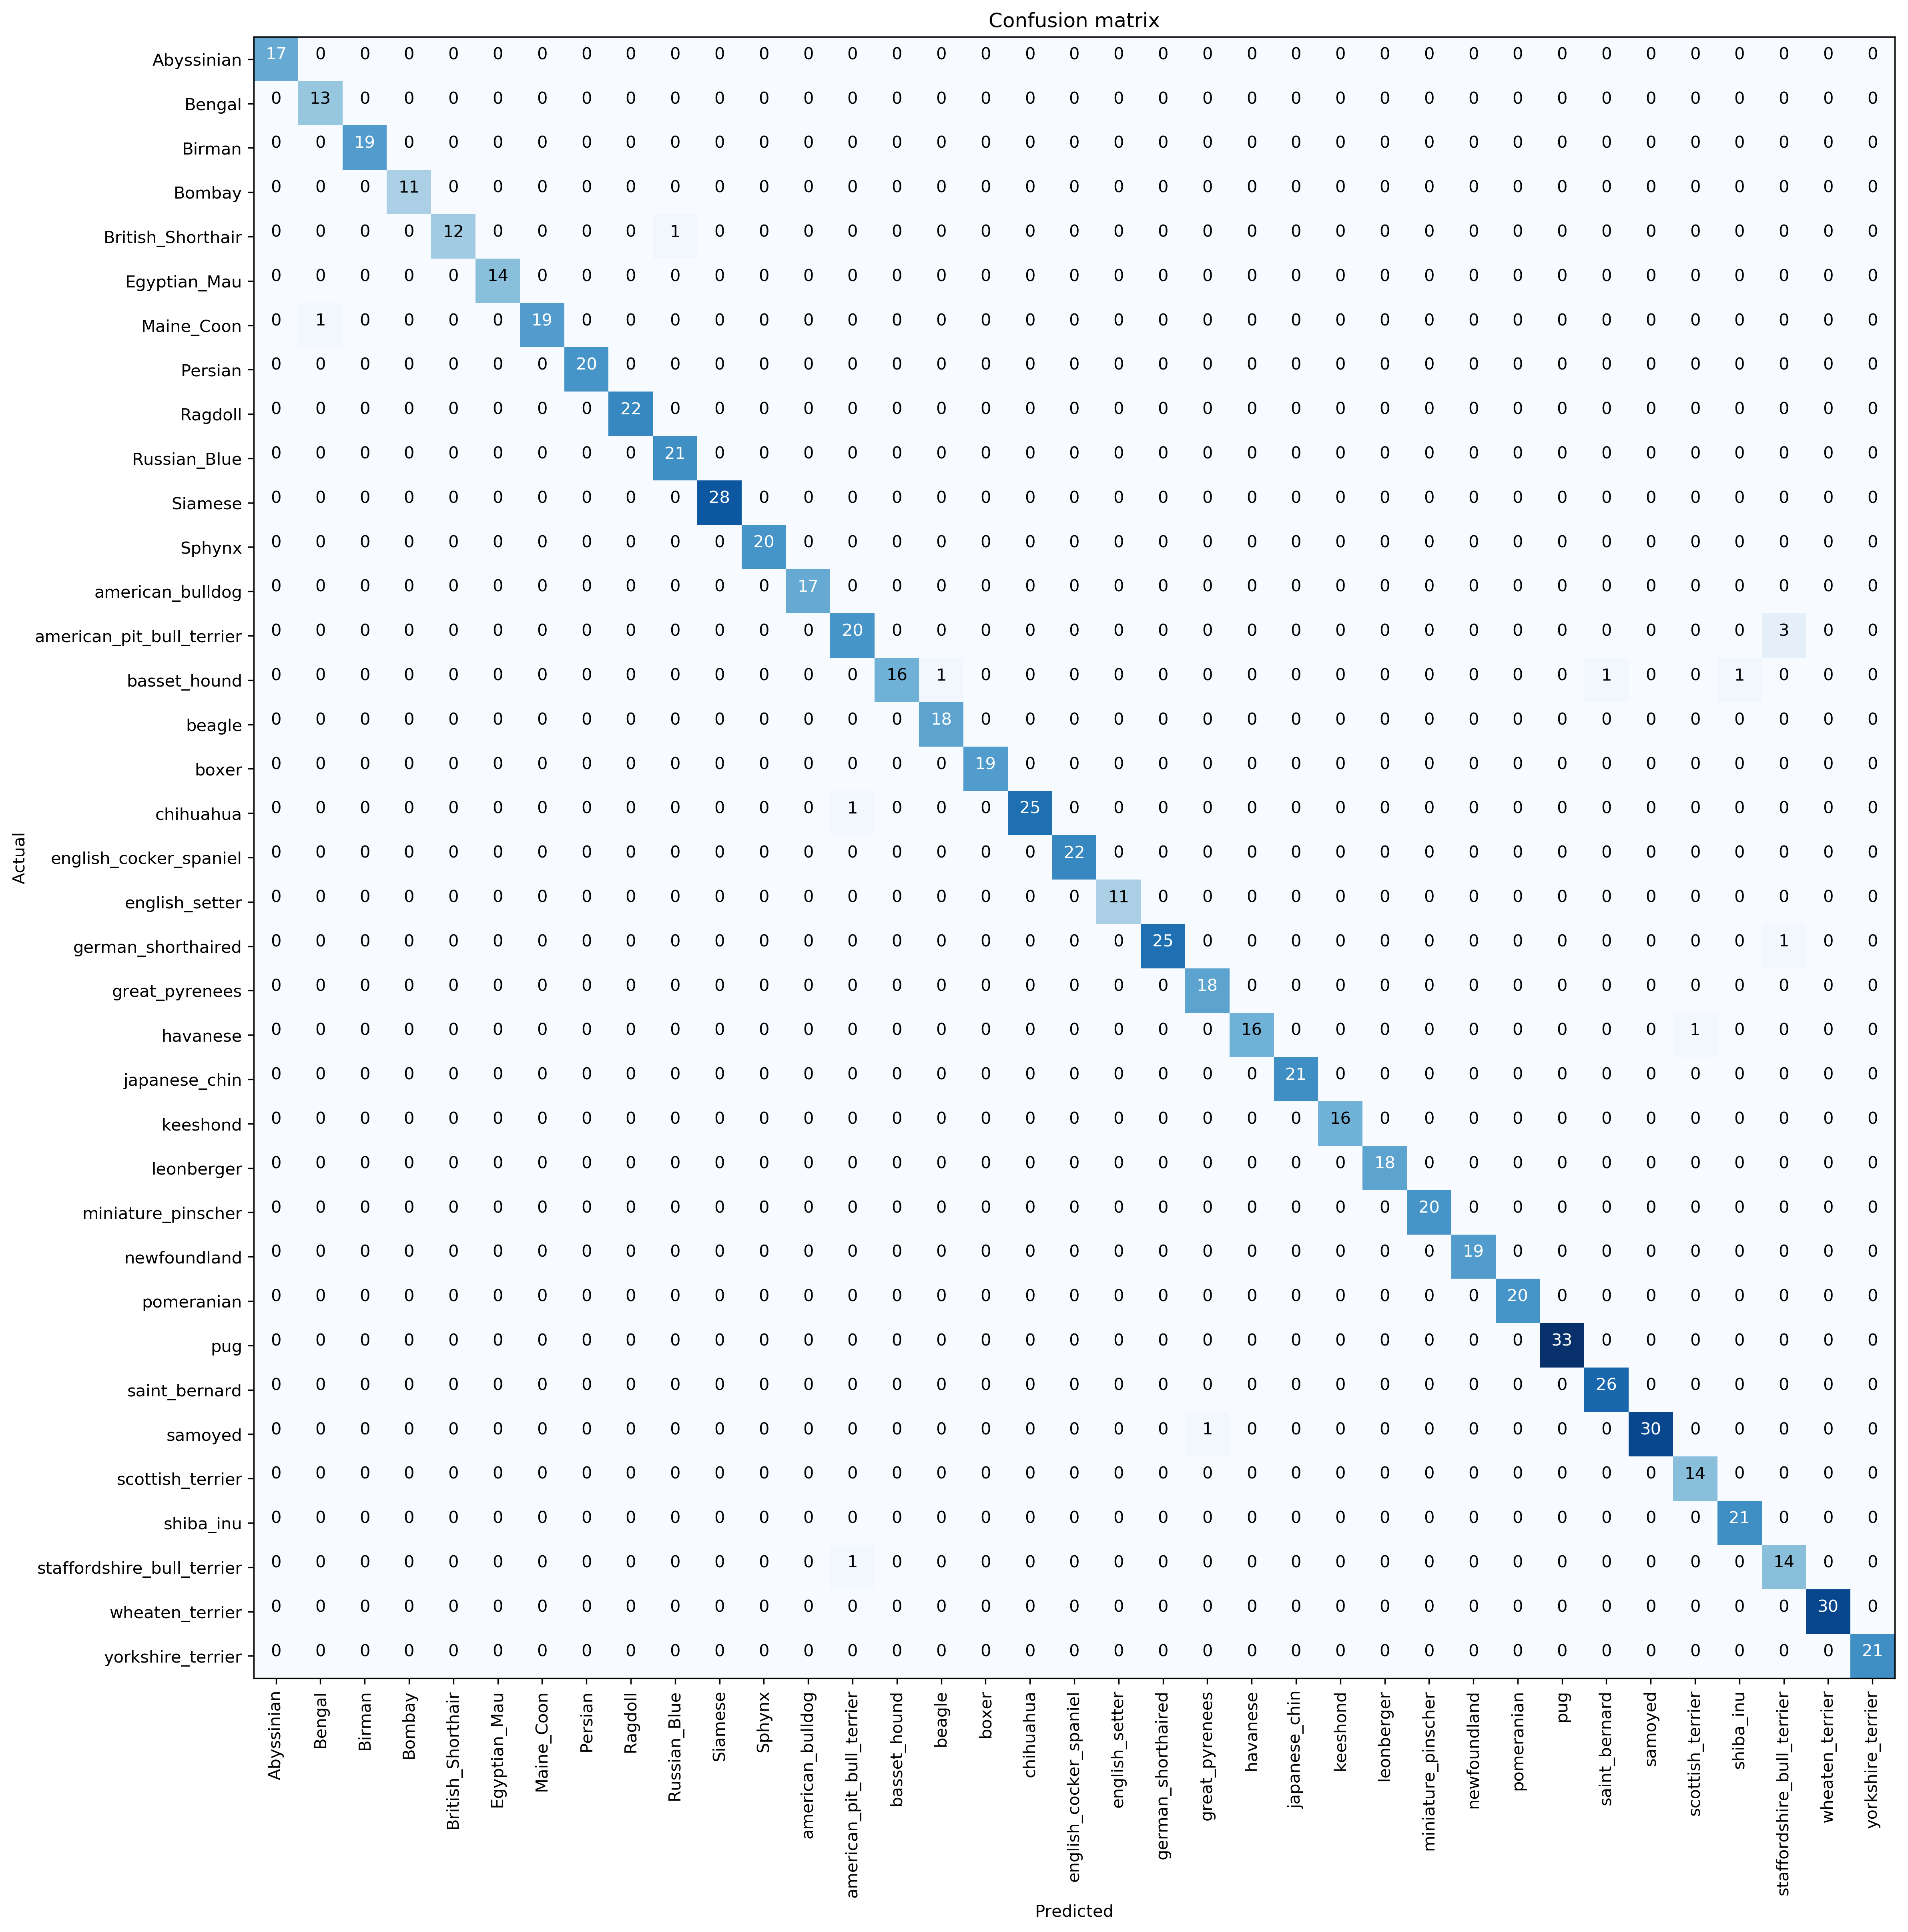

In [13]:
interpreter.plot_confusion_matrix(figsize=(16,16), dpi=300)

In [14]:
interpreter.most_confused(0)

[('american_pit_bull_terrier', 'staffordshire_bull_terrier', 3),
 ('British_Shorthair', 'Russian_Blue', 1),
 ('Maine_Coon', 'Bengal', 1),
 ('basset_hound', 'beagle', 1),
 ('basset_hound', 'saint_bernard', 1),
 ('basset_hound', 'shiba_inu', 1),
 ('chihuahua', 'american_pit_bull_terrier', 1),
 ('german_shorthaired', 'staffordshire_bull_terrier', 1),
 ('havanese', 'scottish_terrier', 1),
 ('samoyed', 'great_pyrenees', 1),
 ('staffordshire_bull_terrier', 'american_pit_bull_terrier', 1)]